In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
df = pd.read_csv('gld_price_data.csv')

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
print(df.dtypes)


Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [8]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
print(correlation)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [9]:
import pandas as pd
import numpy as np


df = pd.read_csv('gld_price_data.csv')

print(df.dtypes)
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
print(correlation)


Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object
              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
correlation = df.corr()

<Axes: >

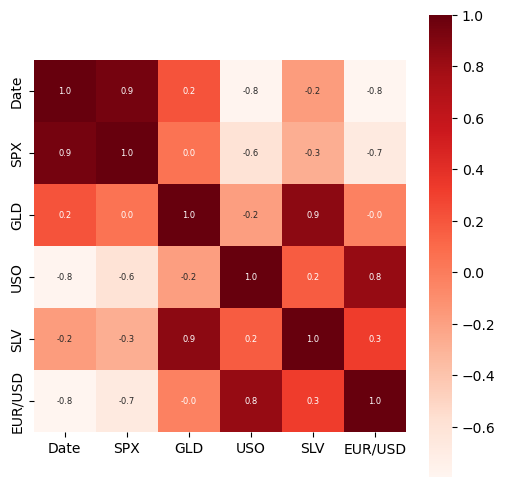

In [12]:
plt.figure(figsize = (6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':6}, cmap='Reds')

In [13]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\hardi\AppData\Local\Temp\ipykernel_12240\3736964373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

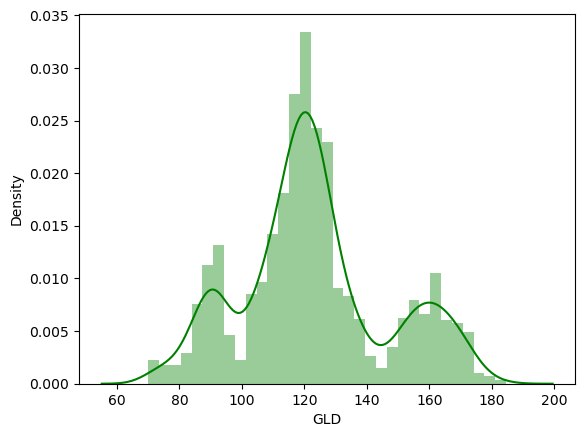

In [14]:
sns.distplot(df['GLD'],color='green')

In [15]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [18]:
X_train, X_test , Y_train , Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 2)

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [21]:
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.53079985  82.01700002 116.0168001  127.70650069 120.72220142
 154.63209884 150.11489865 126.31550025 117.46669851 126.04440038
 116.47750119 171.44510068 141.06819816 168.07199871 115.25210022
 117.40840064 138.21080263 169.96260106 159.28840264 158.73879951
 155.16250024 125.08830027 176.13159936 157.44750306 125.14750074
  93.64210004  77.41570015 120.5548001  119.07639912 167.53830025
  88.15590044 125.11429987  91.14890108 117.69090057 121.07999867
 136.17590077 115.54190136 114.91770097 148.09050003 107.16400121
 104.30670238  87.05109773 126.5097007  117.76340012 154.49789904
 119.67359971 108.30010015 108.17479857  93.31890073 127.02509788
  74.8456007  113.52259913 121.29419985 111.41849906 118.88169899
 120.56799949 160.54449963 169.08870105 146.95639661  85.73889856
  94.24400009  86.69989897  90.67670025 118.91790075 126.36330072
 127.36789998 168.49869992 122.15129962 117.34079893  98.65360016
 167.02770025 142.89969809 132.24060197 121.32720198 121.54009914
 119.83080

In [23]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error: " ,error_score)

R squared error:  0.9892697398358122


In [24]:
Y_test = list(Y_test)

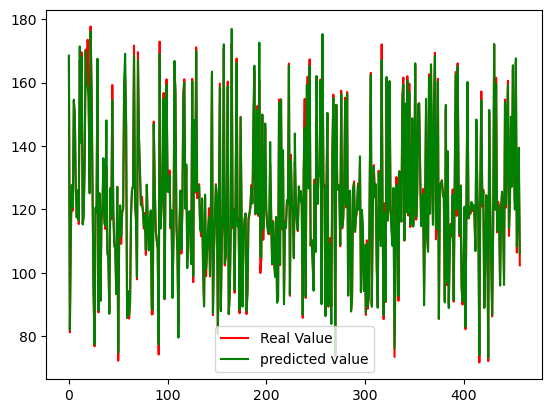

In [25]:
plt.plot(Y_test,color='red',label = 'Real Value')
plt.plot(test_data_prediction , color ='green' , label = 'predicted value')
plt.title = ('Real price vs Predicted Price')
plt.xlabel = ('Number of values')
plt.ylabel = ('GLD price')
plt.legend()
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.320557391659388
Mean Squared Error (MSE): 5.659605983923041
Root Mean Squared Error (RMSE): 2.3789926405777386


In [28]:
r2_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", r2_score)
accuracy_percentage = r2_score * 100
print("Model Accuracy: {:.2f}%".format(accuracy_percentage))


R squared error: 0.9892697398358122
Model Accuracy: 98.93%
